# load data

In [9]:
from datasets import load_dataset

hf_dataset = load_dataset("community-datasets/yahoo_answers_topics", split="train")
hf_dataset

c:\Users\Seu Computador\Documents\Github\TaggingYahooWithBow\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['id', 'topic', 'question_title', 'question_content', 'best_answer'],
    num_rows: 1400000
})

In [10]:
hf_dataset[:5]

{'id': [0, 1, 2, 3, 4],
 'topic': [4, 5, 2, 6, 6],
 'question_title': ["why doesn't an optical mouse work on a glass table?",
  'What is the best off-road motorcycle trail ?',
  'What is Trans Fat? How to reduce that?',
  'How many planes Fedex has?',
  'In the san francisco bay area, does it make sense to rent or buy ?'],
 'question_content': ['or even on some surfaces?',
  'long-distance trail throughout CA',
  'I heard that tras fat is bad for the body.  Why is that? Where can we find it in our daily food?',
  'I heard that it is the largest airline in the world',
  'the prices of rent and the price of buying does not make sense to me, mostly the rent will not cover the mortgage . Is it better to rent a house or to buy?'],
 'best_answer': ['Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse.  The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect imperfections in the underlying surface and determ

## convert to pandas

In [11]:
df_pandas = hf_dataset.to_pandas()
df_pandas.head()

,id,topic,question_title,question_content,best_answer
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,3,6,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,4,6,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


## mapear classe

In [12]:
topic_labels = {
    0: "Society & Culture",
    1: "Science & Mathematics",
    2: "Health",
    3: "Education & Reference",
    4: "Computers & Internet",
    5: "Sports",
    6: "Business & Finance",
    7: "Entertainment & Music",
    8: "Family & Relationships",
    9: "Politics & Government"
}

In [13]:
df_pandas["topic_name"] = df_pandas["topic"].map(topic_labels)
df_pandas["topic_name"]

0          Computers & Internet
1                        Sports
2                        Health
3            Business & Finance
4            Business & Finance
                   ...         
1399995                  Health
1399996      Business & Finance
1399997                  Health
1399998       Society & Culture
1399999    Computers & Internet
Name: topic_name, Length: 1400000, dtype: object

## criar sample

In [14]:
df_copy = df_pandas.sample(n=500)
df_copy.shape

(500, 6)

In [15]:
df_copy.head()

,id,topic,question_title,question_content,best_answer,topic_name
1063793,1063793,4,How do I add a customized gridline to a point ...,"Just wanted to ask, apart from the normal grid...",http://peltiertech.com/Excel/Charts/AddLine.html,Computers & Internet
67594,67594,4,Does anyone know why Yahoo never does system c...,Msn shuts down every once and awhile to kepp t...,Yeh I know it!!\n\nCoz they are busy providing...,Computers & Internet
1390540,1390540,6,NGOs working in Ghana?,I'm a graduate of the University of Ghana curr...,"Here are a few that I know of, but haven't had...",Business & Finance
499311,499311,5,Where can I find a rain fly for my tent?,I'm going camping at the end of the month and ...,I have a great outdoors tent too! I my poles b...,Sports
1160200,1160200,0,the prophet amos?,can someone tell me what the prophet Amos cond...,"In chapter 8, Amos condemns the people of the ...",Society & Culture


# Eda

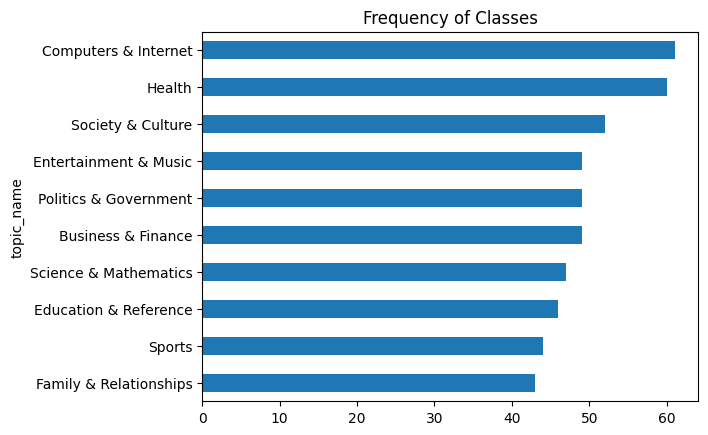

In [16]:
import matplotlib.pyplot as plt


df_copy["topic_name"].value_counts(ascending=True).plot.barh()

plt.title("Frequency of Classes")
plt.show()

## Bow

In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = np.array(["The sun is ...", "The water is but the sun...", "Sun water"])
docs

array(['The sun is ...', 'The water is but the sun...', 'Sun water'],
      dtype='<U27')

In [18]:
bag = count.fit_transform(docs)
bag

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 5)>

In [19]:
print(count.vocabulary_)

{'the': 3, 'sun': 2, 'is': 1, 'water': 4, 'but': 0}


In [20]:
print(bag.toarray())

[[0 1 1 1 0]
 [1 1 1 2 1]
 [0 0 1 0 1]]


## tfidf

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, norm="l2", smooth_idf=True)

np.set_printoptions(precision=2)
print(tfidf.fit_transform(count.fit_transform(docs)).toarray())

[[0.   0.62 0.48 0.62 0.  ]
 [0.46 0.35 0.27 0.69 0.35]
 [0.   0.   0.61 0.   0.79]]


## Cleaning Data

In [27]:
df_copy

,id,topic,question_title,question_content,best_answer,topic_name
1063793,1063793,4,How do I add a customized gridline to a point ...,"Just wanted to ask, apart from the normal grid...",http://peltiertech.com/Excel/Charts/AddLine.html,Computers & Internet
67594,67594,4,Does anyone know why Yahoo never does system c...,Msn shuts down every once and awhile to kepp t...,Yeh I know it!!\n\nCoz they are busy providing...,Computers & Internet
1390540,1390540,6,NGOs working in Ghana?,I'm a graduate of the University of Ghana curr...,"Here are a few that I know of, but haven't had...",Business & Finance
499311,499311,5,Where can I find a rain fly for my tent?,I'm going camping at the end of the month and ...,I have a great outdoors tent too! I my poles b...,Sports
1160200,1160200,0,the prophet amos?,can someone tell me what the prophet Amos cond...,"In chapter 8, Amos condemns the people of the ...",Society & Culture
...,...,...,...,...,...,...
378522,378522,2,Association of Massage Therapist and Wholistic...,,What's the question?,Health
880521,880521,2,How do u knw if ur bi-polar?,there are times when im just fine then i start...,It is also known as Manic Depressive Disorder....,Health
498779,498779,4,What do u do if someone in yahoo answers insul...,,Hit the abuse button left of the answer. You ...,Computers & Internet
718224,718224,3,"What do Piggy, Simon, and the littlun with the...",IN LORD OF THE FLIES!,They are the ones that ore out of the group.\n...,Education & Reference


In [28]:
df_copy.loc[1063793, "question_content"][-50:]

'ay across the closing level of yesterday.\\nThanks.'

In [32]:
import re
def preprocessor(text):
    text = (re.sub(r'[\W]+', ' ', text.lower()))
    return text

In [33]:
df_copy["question_content"] = df_copy["question_content"].apply(preprocessor)
df_copy["question_content"]

1063793    just wanted to ask apart from the normal gridl...
67594      msn shuts down every once and awhile to kepp t...
1390540    i m a graduate of the university of ghana curr...
499311     i m going camping at the end of the month and ...
1160200    can someone tell me what the prophet amos cond...
                                 ...                        
378522                                                      
880521     there are times when im just fine then i start...
498779                                                      
718224                                 in lord of the flies 
129565                                                      
Name: question_content, Length: 500, dtype: object

## Processing Tokens

In [34]:
def tokenizer(text):
    return text.split()

tokenizer("runners like running.")

['runners', 'like', 'running.']

In [36]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

stemming

In [37]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

stop words

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Seu
[nltk_data]     Computador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords


stop = stopwords.words("english")
[w for w in tokenizer_porter("a runner likes running and runs a lot") if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

## Trainig A logit Model

In [41]:
from sklearn.model_selection import train_test_split

X = df_copy["question_content"]
y = df_copy["topic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)

(335,) (335,)


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

"""
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]
"""

small_param_grid = [{'vect__ngram_range': [(1, 1)],
                     'vect__stop_words': [None],
                     'vect__tokenizer': [tokenizer, tokenizer_porter],
                     'clf__penalty': ['l2'],
                     'clf__C': [1.0, 10.0]},
                    {'vect__ngram_range': [(1, 1)],
                     'vect__stop_words': [stop, None],
                     'vect__tokenizer': [tokenizer],
                     'vect__use_idf':[False],
                     'vect__norm':[None],
                     'clf__penalty': ['l2'],
                  'clf__C': [1.0, 10.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, small_param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [45]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Seu Computador\Documents\Github\TaggingYahooWithBow\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Seu Computador\Documents\Github\TaggingYahooWithBow\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,estimator,Pipeline(step...liblinear'))])
,param_grid,"[{'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'], 'vect__ngram_range': [(1, ...)], 'vect__stop_words': [None], ...}, {'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'], 'vect__ngram_range': [(1, ...)], 'vect__norm': [None], ...}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [46]:
print(f'Best parameter set: {gs_lr_tfidf.best_params_}')
print(f'CV Accuracy: {gs_lr_tfidf.best_score_:.3f}')

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', '

In [47]:
clf = gs_lr_tfidf.best_estimator_
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')

Test Accuracy: 0.218


In [60]:
pred = clf.predict(["How to import libs using Python"])
pred

array([4])

In [61]:
label = topic_labels[pred[0]]
print(label)

Computers & Internet
